<h1>Data Wrangling</h1>

<h1>Introduction</h1>

The aim of this project is to wrangle the WeRateDogs from Twitter data and that is by gathering data, assesing the data and clean the dirty data.

<h1>1- Gathering Data</h1>

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import requests
%matplotlib inline
import tweepy
from tweepy import OAuthHandler
import json
from timeit import default_timer as timer
from functools import reduce


In [6]:
tdata=pd.read_csv("twitter-archive-enhanced.csv")
url = "https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv"
response = requests.get(url)
with open('image-predictions.tsv', mode ='wb') as file:
    file.write(response.content)

#read TSV file img
img = pd.read_csv('image-predictions.tsv', sep='\t' )



In [7]:
consumer_key = 'HIDDEN'
consumer_secret = 'HIDDEN'
access_token = 'HIDDEN'
access_secret = 'HIDDEN'
auth = OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)

api = tweepy.API(auth, wait_on_rate_limit=True)
# NOTE TO STUDENT WITH MOBILE VERIFICATION ISSUES:
# df_1 is a DataFrame with the twitter_archive_enhanced.csv file. You may have to
# change line 17 to match the name of your DataFrame with twitter_archive_enhanced.csv
# NOTE TO REVIEWER: this student had mobile verification issues so the following
# Twitter API code was sent to this student from a Udacity instructor
# Tweet IDs for which to gather additional data via Twitter's API
tweet_ids = tdata.tweet_id.values
len(tweet_ids)
# Query Twitter's API for JSON data for each tweet ID in the Twitter archive
count = 0
fails_dict = {}
start = timer()
# Save each tweet's returned JSON as a new line in a .txt file
with open('tweet_json.txt', 'w') as outfile:
    # This loop will likely take 20-30 minutes to run because of Twitter's rate limit
    for tweet_id in tweet_ids:
        count += 1
        print(str(count) + ": " + str(tweet_id))
        try:
            tweet = api.get_status(tweet_id, tweet_mode='extended')
            print("Success")
            json.dump(tweet._json, outfile)
            outfile.write('\n')
        except tweepy.TweepError as e:
            print("Fail")
            fails_dict[tweet_id] = e
            pass
end = timer()
print(end - start)
print(fails_dict)


1: 892420643555336193
Success
2: 892177421306343426
Success
3: 891815181378084864
Success
4: 891689557279858688
Success
5: 891327558926688256
Success
6: 891087950875897856
Success
7: 890971913173991426
Success
8: 890729181411237888
Success
9: 890609185150312448
Success
10: 890240255349198849
Success
11: 890006608113172480
Success
12: 889880896479866881
Success
13: 889665388333682689
Success
14: 889638837579907072
Success
15: 889531135344209921
Success
16: 889278841981685760
Success
17: 888917238123831296
Success
18: 888804989199671297
Success
19: 888554962724278272
Success
20: 888202515573088257
Fail
21: 888078434458587136
Success
22: 887705289381826560
Success
23: 887517139158093824
Success
24: 887473957103951883
Success
25: 887343217045368832
Success
26: 887101392804085760
Success
27: 886983233522544640
Success
28: 886736880519319552
Success
29: 886680336477933568
Success
30: 886366144734445568
Success
31: 886267009285017600
Success
32: 886258384151887873
Success
33: 8860541600590725

In [7]:
tweets_list = []
with open('tweet_json.txt', 'r') as json_file:
    for line in json_file:
        status = json.loads(line)
        
        tweets_list.append({'tweet_id': status['id'],
                        'retweet_count': status['retweet_count'],
                        'favorite_count': status['favorite_count']
                       })

newlist = pd.DataFrame(tweets_list, columns = ['tweet_id', 'retweet_count', 'favorite_count'])

In [8]:
print("The lengh of the result", len(tweets_list))

The lengh of the result 2340


In [9]:
newlist.head(10)

,tweet_id,retweet_count,favorite_count
0,892420643555336193,8302,37993
1,892177421306343426,6130,32617
2,891815181378084864,4060,24559
3,891689557279858688,8441,41321
4,891327558926688256,9146,39505
5,891087950875897856,3042,19854
6,890971913173991426,2015,11605
7,890729181411237888,18406,64074
8,890609185150312448,4178,27261
9,890240255349198849,7199,31284


<h1>2-Assesing Data</h1>

In [10]:
tdata.head(20)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None
5,891087950875897856,NaN,NaN,2017-07-29 00:08:17 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a majestic great white breaching ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891087950...,13,10,None,None,None,None,None
6,890971913173991426,NaN,NaN,2017-07-28 16:27:12 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Jax. He enjoys ice cream so much he gets ...,NaN,NaN,NaN,"https://gofundme.com/ydvmve-surgery-for-jax,ht...",13,10,Jax,None,None,None,None
7,890729181411237888,NaN,NaN,2017-07-28 00:22:40 +0000,"<a href=""http://twitter.com/download/iphone"" r...",When you watch your owner call another dog a g...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890729181...,13,10,None,None,None,None,None
8,890609185150312448,NaN,NaN,2017-07-27 16:25:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Zoey. She doesn't want to be one of th...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890609185...,13,10,Zoey,None,None,None,None
9,890240255349198849,NaN,NaN,2017-07-26 15:59:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Cassie. She is a college pup. Studying...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890240255...,14,10,Cassie,doggo,None,None,None


In [11]:
tdata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

In [12]:
tdata['rating_numerator'].value_counts()

12      558
11      464
10      461
13      351
9       158
8       102
7        55
14       54
5        37
6        32
3        19
4        17
1         9
2         9
420       2
0         2
15        2
75        2
80        1
20        1
24        1
26        1
44        1
50        1
60        1
165       1
84        1
88        1
144       1
182       1
143       1
666       1
960       1
1776      1
17        1
27        1
45        1
99        1
121       1
204       1
Name: rating_numerator, dtype: int64

In [13]:
tdata['doggo'].value_counts()

None     2259
doggo      97
Name: doggo, dtype: int64

In [14]:
tdata['floofer'].value_counts()

None       2346
floofer      10
Name: floofer, dtype: int64

In [15]:
tdata['pupper'].value_counts()

None      2099
pupper     257
Name: pupper, dtype: int64

In [16]:
tdata['puppo'].value_counts()

None     2326
puppo      30
Name: puppo, dtype: int64

In [17]:
tdata['name'].value_counts()

None         745
a             55
Charlie       12
Cooper        11
Oliver        11
Lucy          11
Lola          10
Tucker        10
Penny         10
Bo             9
Winston        9
Sadie          8
the            8
Toby           7
Bailey         7
Buddy          7
an             7
Daisy          7
Rusty          6
Milo           6
Scout          6
Oscar          6
Dave           6
Jack           6
Jax            6
Bella          6
Koda           6
Stanley        6
Leo            6
Alfie          5
            ... 
Pip            1
Enchilada      1
Huck           1
Scott          1
Tycho          1
Mutt           1
Nida           1
Meera          1
Baron          1
Fwed           1
Harvey         1
Al             1
Marlee         1
Rodney         1
Leonidas       1
Zeek           1
Luther         1
Akumi          1
Chef           1
Arnold         1
Pluto          1
Roscoe         1
Glacier        1
Mark           1
Storkson       1
Carll          1
Banjo          1
Durg          

In [18]:
tdata['source'].value_counts()

<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>     2221
<a href="http://vine.co" rel="nofollow">Vine - Make a Scene</a>                          91
<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>                       33
<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>      11
Name: source, dtype: int64

In [19]:
tdata['retweeted_status_user_id'].value_counts()

4.196984e+09    156
4.296832e+09      2
5.870972e+07      1
6.669901e+07      1
4.119842e+07      1
7.475543e+17      1
7.832140e+05      1
7.266347e+08      1
4.871977e+08      1
5.970642e+08      1
4.466750e+07      1
1.228326e+09      1
7.992370e+07      1
2.488557e+07      1
7.874618e+17      1
3.638908e+08      1
5.128045e+08      1
8.117408e+08      1
1.732729e+09      1
1.960740e+07      1
1.547674e+08      1
3.410211e+08      1
7.124572e+17      1
2.804798e+08      1
1.950368e+08      1
Name: retweeted_status_user_id, dtype: int64

In [20]:
tdata['text'].value_counts()

Heartwarming scene here. Son reuniting w father after coming home from deployment. Very moving. 10/10 for both pups https://t.co/95JJevQOWW                             1
This is Georgie. He's very shy. Only puppears when called. Aggressively average at fetch. Unique front paws. Looks slippery. 10/10 would pet https://t.co/rcDs5LkiSj    1
RT @dog_rates: This is Arnie. He's a Nova Scotian Fridge Floof. Rare af. 12/10 https://t.co/lprdOylVpS                                                                  1
RT @dog_rates: This is Timison. He just told an awful joke but is still hanging on to the hope that you'll laugh with him. 10/10 https://t.…                            1
Yea I lied. Here's more. All 13/10 https://t.co/ZQZf2U4xCP                                                                                                              1
This is Zoe. She was trying to stealthily take a picture of you but you just noticed. 9/10 not so sneaky pupper https://t.co/FfH3o88Vta               

In [21]:
img.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


In [22]:
img.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [23]:
img['tweet_id'].value_counts()

685532292383666176    1
826598365270007810    1
692158366030913536    1
714606013974974464    1
715696743237730304    1
776477788987613185    1
772114945936949249    1
699775878809702401    1
780858289093574656    1
700462010979500032    1
732726085725589504    1
738883359779196928    1
798644042770751489    1
743510151680958465    1
837012587749474308    1
833722901757046785    1
668620235289837568    1
842765311967449089    1
685315239903100929    1
673686845050527744    1
680473011644985345    1
666051853826850816    1
675853064436391936    1
693231807727280129    1
705475953783398401    1
829449946868879360    1
759923798737051648    1
667160273090932737    1
680934982542561280    1
743545585370791937    1
                     ..
794926597468000259    1
776113305656188928    1
825026590719483904    1
834209720923721728    1
775733305207554048    1
669564461267722241    1
879492040517615616    1
720775346191278080    1
666362758909284353    1
750506206503038976    1
6931556864910008

In [24]:
newlist.head()

,tweet_id,retweet_count,favorite_count
0,892420643555336193,8302,37993
1,892177421306343426,6130,32617
2,891815181378084864,4060,24559
3,891689557279858688,8441,41321
4,891327558926688256,9146,39505


In [25]:
newlist.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2340 entries, 0 to 2339
Data columns (total 3 columns):
tweet_id          2340 non-null int64
retweet_count     2340 non-null int64
favorite_count    2340 non-null int64
dtypes: int64(3)
memory usage: 54.9 KB


<h1>Quality</h1>

1-we need to change the timestamp variable type from object to date<br>
2-the tweet_id variable should be string instead of integer.<br>
3-we should drop the unneccecary coulmns that we dont need such as retweeted_status_id , retweeted_status_user_id and retweeted_status_timestamp <br>
4-in the coulumn "Name" there is None.<br>
5-we should also drop the in_reply_to_user_id coulmn and in_reply_to_status_id since the have alot of NaN's. <br>
6-the source coulmn has html tags.<br>
7-in the coulumn "Name" there is not understandble names.<br>
8-in the coulumn "Name" there is one character varaibles such as "O", "a".<br>


<h1>Tidiness</h1>

1-Merge the 3 dataframes together in one dataframe.<br>
2-in doggo, floofer, pupper and puppo coulmn there is alot of None's and it represents the staging of the dogs so i will create one coulmn named dog_Type.<br>
3-creat a coulmn called Rating.<br>

<h1>2-Cleaning Data</h1>

In [26]:
#copy the Data 
tclean= tdata.copy()
imgclean=img.copy()
newlistclean=newlist.copy()

**Define**<br>
1-Merge the 3 dataframes together in one dataframe.

**Code**

In [27]:
tdata = [tclean, imgclean, newlistclean]
twitterdata = reduce(lambda left,right: pd.merge(left,right,on='tweet_id'), tdata)

**Test**

In [28]:
twitterdata.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,...,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,retweet_count,favorite_count
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,...,0.097049,False,bagel,0.085851,False,banana,0.076110,False,8302,37993
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,...,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True,6130,32617
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,...,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True,4060,24559
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,...,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False,8441,41321
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,...,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True,9146,39505


In [29]:
twitterdata.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2067 entries, 0 to 2066
Data columns (total 30 columns):
tweet_id                      2067 non-null int64
in_reply_to_status_id         23 non-null float64
in_reply_to_user_id           23 non-null float64
timestamp                     2067 non-null object
source                        2067 non-null object
text                          2067 non-null object
retweeted_status_id           75 non-null float64
retweeted_status_user_id      75 non-null float64
retweeted_status_timestamp    75 non-null object
expanded_urls                 2067 non-null object
rating_numerator              2067 non-null int64
rating_denominator            2067 non-null int64
name                          2067 non-null object
doggo                         2067 non-null object
floofer                       2067 non-null object
pupper                        2067 non-null object
puppo                         2067 non-null object
jpg_url                       2067 

**Define** <br>
in doggo, floofer, pupper and puppo coulmn there is alot of None's and it represents the staging of the dogs so i will create one coulmn named dog_type.

**code**

In [30]:
twitterdata['Dog_type'] = twitterdata['text'].str.extract('(doggo|floofer|pupper|puppo)')
twitterdata.loc[twitterdata.Dog_type == 'doggopupper', 'Dog_type'] = 'doggo,pupper'
twitterdata.loc[twitterdata.Dog_type == 'doggopuppo', 'Dog_type'] = 'doggo,puppo'
twitterdata.loc[twitterdata.Dog_type == 'doggofloofer', 'Dog_type'] = 'doggo,floofer'
# Handle missing values
twitterdata.loc[twitterdata.Dog_type == '', 'Dog_type'] = np.nan
twitterdata[['Dog_type','doggo', 'floofer', 'pupper', 'puppo']].head(30)

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:1: FutureWarning: currently extract(expand=None) means expand=False (return Index/Series/DataFrame) but in a future version of pandas this will be changed to expand=True (return DataFrame)
  """Entry point for launching an IPython kernel.


,Dog_type,doggo,floofer,pupper,puppo
0,NaN,None,None,None,None
1,NaN,None,None,None,None
2,NaN,None,None,None,None
3,NaN,None,None,None,None
4,NaN,None,None,None,None
5,NaN,None,None,None,None
6,NaN,None,None,None,None
7,NaN,None,None,None,None
8,NaN,None,None,None,None
9,doggo,doggo,None,None,None


In [31]:
twitterdata = twitterdata.drop(['doggo', 'floofer', 'pupper', 'puppo'], axis=1)

**test**

In [32]:
twitterdata.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2067 entries, 0 to 2066
Data columns (total 27 columns):
tweet_id                      2067 non-null int64
in_reply_to_status_id         23 non-null float64
in_reply_to_user_id           23 non-null float64
timestamp                     2067 non-null object
source                        2067 non-null object
text                          2067 non-null object
retweeted_status_id           75 non-null float64
retweeted_status_user_id      75 non-null float64
retweeted_status_timestamp    75 non-null object
expanded_urls                 2067 non-null object
rating_numerator              2067 non-null int64
rating_denominator            2067 non-null int64
name                          2067 non-null object
jpg_url                       2067 non-null object
img_num                       2067 non-null int64
p1                            2067 non-null object
p1_conf                       2067 non-null float64
p1_dog                        2067 

In [33]:
twitterdata["Dog_type"].value_counts()

pupper     231
doggo       75
puppo       29
floofer      3
Name: Dog_type, dtype: int64

**Define**

create a coulmn called Rating.

**code**

In [34]:
twitterdata['Rating'] = twitterdata['rating_numerator'] / twitterdata['rating_denominator']

**Test**

In [35]:
twitterdata["Rating"].value_counts()

1.200000      477
1.000000      430
1.100000      419
1.300000      280
0.900000      151
0.800000       95
0.700000       51
1.400000       38
0.500000       35
0.600000       32
0.300000       19
0.400000       15
0.200000       10
0.100000        4
0.000000        2
0.818182        1
2.700000        1
3.428571        1
0.636364        1
177.600000      1
2.600000        1
42.000000       1
7.500000        1
1.500000        1
Name: Rating, dtype: int64

**Define**

we need to change the timestamp variable type from object to date

**code**

In [36]:
twitterdata['timestamp'] = pd.to_datetime(twitterdata['timestamp'], format = "%Y-%m-%d %H:%M:%S")

**Test**

In [37]:
twitterdata["timestamp"].value_counts()

2015-12-08 16:21:41    1
2016-01-19 21:18:22    1
2016-01-01 05:00:24    1
2017-07-25 16:11:53    1
2016-09-15 17:48:25    1
2016-03-13 23:24:56    1
2016-07-17 01:05:25    1
2016-03-12 19:35:15    1
2015-11-20 19:12:01    1
2017-03-26 01:38:00    1
2015-11-27 22:01:40    1
2016-12-14 17:16:53    1
2016-01-05 02:30:55    1
2016-07-26 00:08:05    1
2016-10-13 23:23:56    1
2017-01-31 01:27:39    1
2016-01-08 03:50:03    1
2016-06-25 19:42:08    1
2015-11-22 17:40:27    1
2016-02-29 01:17:46    1
2015-11-26 16:59:01    1
2015-11-20 15:36:22    1
2016-01-29 02:46:29    1
2016-12-25 16:00:16    1
2016-02-10 18:11:03    1
2016-07-18 18:43:07    1
2015-12-12 04:23:49    1
2017-01-06 17:33:29    1
2016-06-13 01:06:33    1
2015-12-02 02:30:43    1
                      ..
2015-11-23 02:52:48    1
2016-10-19 15:37:03    1
2017-06-28 16:09:20    1
2015-12-08 00:15:09    1
2017-07-06 15:58:11    1
2015-12-03 03:30:19    1
2016-03-30 15:34:51    1
2016-03-14 23:19:03    1
2016-09-16 16:00:31    1


**Define**

the tweet_id variable should be string instead of integer.

**code**

In [38]:
twitterdata['tweet_id'] = twitterdata['tweet_id'].astype(str)

**Test**

In [39]:
twitterdata.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2067 entries, 0 to 2066
Data columns (total 28 columns):
tweet_id                      2067 non-null object
in_reply_to_status_id         23 non-null float64
in_reply_to_user_id           23 non-null float64
timestamp                     2067 non-null datetime64[ns]
source                        2067 non-null object
text                          2067 non-null object
retweeted_status_id           75 non-null float64
retweeted_status_user_id      75 non-null float64
retweeted_status_timestamp    75 non-null object
expanded_urls                 2067 non-null object
rating_numerator              2067 non-null int64
rating_denominator            2067 non-null int64
name                          2067 non-null object
jpg_url                       2067 non-null object
img_num                       2067 non-null int64
p1                            2067 non-null object
p1_conf                       2067 non-null float64
p1_dog                    

**Define**

we should drop the unneccecary coulmns that we dont need such as retweeted_status_id , retweeted_status_user_id and retweeted_status_timestamp

**code**

In [40]:
twitterdata.drop(['retweeted_status_id', 
                        'retweeted_status_user_id', 
                        'retweeted_status_timestamp'], axis=1, inplace=True)

**Test**

In [41]:
twitterdata.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2067 entries, 0 to 2066
Data columns (total 25 columns):
tweet_id                 2067 non-null object
in_reply_to_status_id    23 non-null float64
in_reply_to_user_id      23 non-null float64
timestamp                2067 non-null datetime64[ns]
source                   2067 non-null object
text                     2067 non-null object
expanded_urls            2067 non-null object
rating_numerator         2067 non-null int64
rating_denominator       2067 non-null int64
name                     2067 non-null object
jpg_url                  2067 non-null object
img_num                  2067 non-null int64
p1                       2067 non-null object
p1_conf                  2067 non-null float64
p1_dog                   2067 non-null bool
p2                       2067 non-null object
p2_conf                  2067 non-null float64
p2_dog                   2067 non-null bool
p3                       2067 non-null object
p3_conf           

**Define**

in the coulumn "Name" there is None.

**Define**

in the coulumn "Name" there is one character varaibles such as "O", "a".

**Define**

in the coulumn "Name" there are not understandble names.

**code**

In [42]:
nameNan = []
for row in twitterdata['name']:
    if row[0].islower() and row not in nameNan:
        nameNan.append(row)   
print(nameNan)

twitterdata['name'].replace(nameNan, np.nan,inplace = True)
twitterdata['name'].replace('None', np.nan,inplace = True)
twitterdata['name'].replace('O', np.nan,inplace = True)

['such', 'a', 'quite', 'one', 'incredibly', 'an', 'very', 'just', 'my', 'not', 'his', 'getting', 'this', 'unacceptable', 'all', 'infuriating', 'the', 'actually', 'by', 'officially', 'light', 'space']


**Test**

In [43]:
twitterdata['name'].value_counts()

Cooper      10
Charlie     10
Lucy        10
Tucker      10
Penny       10
Oliver      10
Sadie        8
Lola         8
Bo           8
Winston      8
Daisy        7
Toby         7
Milo         6
Bailey       6
Scout        6
Rusty        6
Jax          6
Bella        6
Stanley      6
Dave         6
Koda         6
Buddy        5
Chester      5
Oscar        5
Larry        5
Alfie        5
Louis        5
Leo          5
Loki         4
Chip         4
            ..
Nugget       1
Erik         1
Oreo         1
Sailor       1
Kulet        1
Ivar         1
Akumi        1
Luther       1
Zeek         1
Leonidas     1
Wesley       1
Willow       1
Dook         1
Anthony      1
Emmie        1
Sephie       1
Mairi        1
Yoda         1
Keurig       1
Chuq         1
Daniel       1
Snicku       1
Bodie        1
Lupe         1
Willie       1
Harvey       1
Al           1
Marlee       1
Rodney       1
Rueben       1
Name: name, Length: 912, dtype: int64

**Define**

we should also drop the in_reply_to_user_id coulmn and in_reply_to_status_id since the have alot of NaN's.

**code**

In [44]:
twitterdata.drop(['in_reply_to_user_id', 
                        'in_reply_to_status_id'], axis=1, inplace=True)

**Test**

In [45]:
twitterdata.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2067 entries, 0 to 2066
Data columns (total 23 columns):
tweet_id              2067 non-null object
timestamp             2067 non-null datetime64[ns]
source                2067 non-null object
text                  2067 non-null object
expanded_urls         2067 non-null object
rating_numerator      2067 non-null int64
rating_denominator    2067 non-null int64
name                  1391 non-null object
jpg_url               2067 non-null object
img_num               2067 non-null int64
p1                    2067 non-null object
p1_conf               2067 non-null float64
p1_dog                2067 non-null bool
p2                    2067 non-null object
p2_conf               2067 non-null float64
p2_dog                2067 non-null bool
p3                    2067 non-null object
p3_conf               2067 non-null float64
p3_dog                2067 non-null bool
retweet_count         2067 non-null int64
favorite_count        2067 non-n

**Define**

the source coulmn has html tags.

**code**

In [46]:
twitterdata.source = twitterdata.source.str.replace(r'<(?:a\b[^>]*>|/a>)', '')

**Test**

In [47]:
twitterdata['source'].value_counts()

Twitter for iPhone    2027
Twitter Web Client      30
TweetDeck               10
Name: source, dtype: int64

<h1>Storing, Visualizing and Analyzing the Data</h1>

In [48]:
#now its time to store our changes
twitterdata.to_csv('twitter_archive_master.csv', encoding='utf-8', index=False)

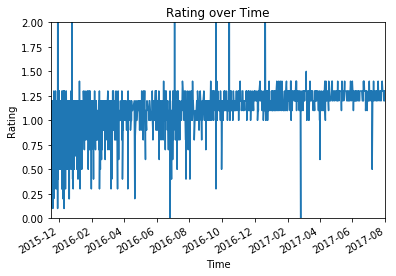

In [49]:
twitterdata.groupby('timestamp')['Rating'].mean().plot(kind='line')
plt.ylim(0, 2)
plt.title('Rating over Time')
plt.xlabel('Time')
plt.ylabel('Rating')
plt.show;

Text(0.5,1,'count of retweets over Rating')

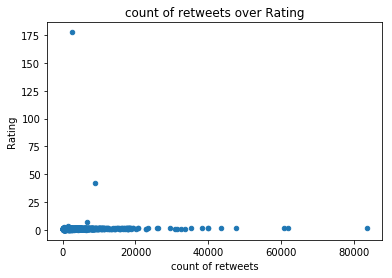

In [56]:
twitterdata.plot(x='retweet_count', y='Rating', kind='scatter')
plt.xlabel('count of retweets')
plt.ylabel('Rating')
plt.title('count of retweets over Rating')

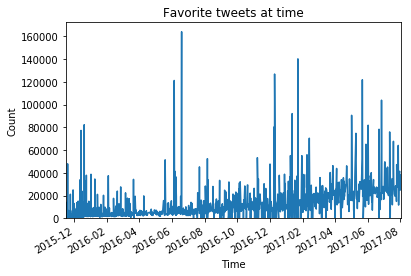

In [57]:
twitterdata.favorite_count.groupby(twitterdata["timestamp"]).mean().plot('line').set_ylim(0, )
plt.title('Favorite tweets at time')
plt.ylabel('Count')
plt.xlabel('Time');

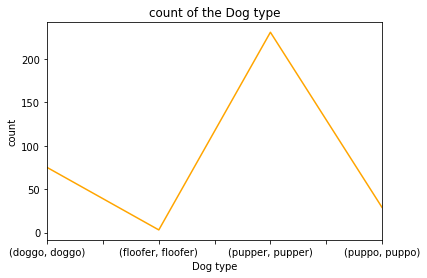

In [58]:
var = twitterdata.groupby('Dog_type')
var['Dog_type'].value_counts().plot(kind = 'line', color ='orange')
plt.title('count of the Dog type')
plt.xlabel('Dog type')
plt.ylabel('count');